# 05 - Modeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from scipy.optimize import minimize
from nltk import word_tokenize
from nltk.corpus import stopwords

# Part 1 - Sentiment Analysis on Stock Market

In [2]:
data = pd.read_csv("/data/thejustinh/DataSentiment.csv")
data.head()

,Unnamed: 0,Unnamed: 0.1,Date,Open,High,Low,Close,Volume,Oil_Open,Oil_Settle,...,Top20,Top21,Top22,Top23,Top24,Top25,Compound,Negative,Positive,Neutral
0,0,0,2016-07-01,17924.240234,18002.380859,17916.910156,17949.369141,82160000,48.46,48.99,...,Mass fish kill in Vietnam solved as Taiwan ste...,Philippines president Rodrigo Duterte urges pe...,Spain arrests three Pakistanis accused of prom...,"Venezuela, where anger over food shortages is ...",A Hindu temple worker has been killed by three...,Ozone layer hole seems to be healing - US &amp...,-0.9451,0.157,0.092,0.751
1,1,1,2016-06-30,17712.759766,17930.609375,17711.800781,17929.990234,133030000,49.54,48.33,...,More Than 100 Nobel Laureates Call Out Greenpe...,British pedophile sentenced to 85 years in US ...,"US permitted 1,200 offshore fracks in Gulf of ...",We will be swimming in ridicule - French beach...,UEFA says no minutes of silence for Istanbul v...,Law Enforcement Sources: Gun Used in Paris Ter...,-0.9796,0.162,0.060,0.778
2,2,2,2016-06-29,17456.019531,17704.509766,17456.019531,17694.679688,106380000,48.23,49.88,...,Rupert Murdoch describes Brexit as 'wonderful'...,More than 40 killed in Yemen suicide attacks,Google Found Disastrous Symantec and Norton Vu...,Extremist violence on the rise in Germany: Dom...,BBC News: Labour MPs pass Corbyn no-confidence...,Tiny New Zealand town with 'too many jobs' lau...,-0.9868,0.185,0.075,0.740
3,3,3,2016-06-28,17190.509766,17409.720703,17190.509766,17409.720703,112190000,46.73,47.85,...,Palestinians stone Western Wall worshipers; po...,Jean-Claude Juncker asks Farage: Why are you h...,"""Romanians for Remainians"" offering a new home...",Brexit: Gibraltar in talks with Scotland to st...,8 Suicide Bombers Strike Lebanon,Mexico's security forces routinely use 'sexual...,-0.8610,0.103,0.073,0.824
4,4,4,2016-06-27,17355.210938,17355.210938,17063.080078,17140.240234,138740000,47.63,46.33,...,Edward Snowden lawyer vows new push for pardon...,Brexit opinion poll reveals majority don't wan...,"Conservative MP Leave Campaigner: ""The leave c...","Economists predict UK recession, further weake...","New EU 'superstate plan by France, Germany: Cr...",Pakistani clerics declare transgender marriage...,-0.9788,0.161,0.048,0.791


Below is a very important aspect when predicting the model. By shifting the sentiment analysis data up one row, we are essentially seeing how the previous day's news and quotes has an affect on the stock/futures and commodities market the following day. In other words, we are testing to predict Y on Date T+1 using news and stock quotes  from date T.

In [3]:
data.Status_change = data.Status_change.shift(+1)
data.Oil_Diff = data.Oil_Diff.shift(+1)
data.Gas_Diff = data.Gas_Diff.shift(+1)
data.Gold_Diff = data.Gold_Diff.shift(+1)

data = data[1:]

## Features

Here we create a feature DataFrame named X with the numerical columns from the original dataset.

In [4]:
X = data[['Open', 'High', 'Low', 'Close', 'Volume', 
          'Compound', 'Negative', 'Positive', 'Neutral']]

Here is the final features we will use.

In [5]:
X.columns

Index(['Open', 'High', 'Low', 'Close', 'Volume', 'Compound', 'Negative',
       'Positive', 'Neutral'],
      dtype='object')

### Target

In [6]:
y = data['Status_change']
yc = y.value_counts()
yc

1.0    1036
0.0     863
Name: Status_change, dtype: int64

### Train/Test Split

Here is a train/test split, with 70% of the data used for training and a random_state=0.

In [7]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0, train_size=0.7)

### Gaussian Naive-Bayes Classifer

Here we use the GaussianNB classifier to: 1) Instantiate the model class, 2) Fit the model with the training data, 3) Use the model to make predictions about the test data.

In [8]:
model1 = GaussianNB()
model1.fit(Xtrain, ytrain)
ypred1 = model1.predict(Xtest)

Accuracy of the model:

In [9]:
accuracy_score(ytest, ypred1)

0.56491228070175437

### Random Forest Classifier

In [10]:
model2 = RandomForestClassifier(n_estimators=100, random_state=0)
model2.fit(Xtrain, ytrain)
ypred2 = model2.predict(Xtest)
accuracy_score(ytest, ypred2)

0.50175438596491229

Using cross_val_score to perform k-fold cross validation (k=10) with this model.

In [11]:
cross_val_score(model2, X, y, cv=10)

array([ 0.47120419,  0.47120419,  0.42931937,  0.48947368,  0.5       ,
        0.53157895,  0.47619048,  0.5026455 ,  0.5026455 ,  0.48677249])

Average accuracy and its standard deviation

In [12]:
_.mean(), _.std()

(0.48610343485240148, 0.02566494622175489)

Confusion matrix for the model.

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


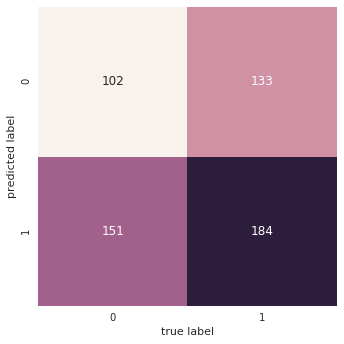

In [13]:
mat = confusion_matrix(ytest, ypred2)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')
plt.show()

Feature and Importance: 1) Feature: the names of the feature, and 2) the importances of that feature

In [14]:
features = pd.DataFrame({'Feature': X.columns, 'Importance': model2.feature_importances_})
features.sort_values('Importance', ascending=False, inplace=True)
features

,Feature,Importance
4,Volume,0.130656
5,Compound,0.126213
8,Neutral,0.118511
6,Negative,0.109795
3,Close,0.106711
1,High,0.105168
7,Positive,0.104466
2,Low,0.099332
0,Open,0.099149


As shown from the above, the Gaussian NB classifier had a better accuracy score than the Random Forest Classifier by about 8% on average at 56.5%. Though 57% is a decent accuracy prediction for how volatile the stock market is, there  must be a better way (a better model) to make predictions for the stock market using sentiment analysis. Or if not, could it be possible that this model would work better for a different market? Looking at our data specifically the news headlines, it seems as if some of the trending headlines feature more global events which in turn may not even affect the U.S. stock market at all. In the next part, we take a look at how our model affects the Futures and Commodities, a market where commodities that are traded at a futures exchange such as oil, gas, and gold on a more global level.

# Part 2 - Sentiment Analysis on Futures and Commodities
## Features

In this section, we focus on the Crude Oil industry of commodities.

Here we create a feature DataFrame named X2 with the numerical columns from the original dataset.

In [15]:
X2 = data[['Oil_Open', 'Oil_Settle', 'Oil_Volume', 
           'Compound', 'Negative', 'Positive', 'Neutral']]
X2.dropna()
X2.head()

,Oil_Open,Oil_Settle,Oil_Volume,Compound,Negative,Positive,Neutral
1,49.54,48.33,34723.0,-0.9796,0.162,0.060,0.778
2,48.23,49.88,48243.0,-0.9868,0.185,0.075,0.740
3,46.73,47.85,48103.0,-0.8610,0.103,0.073,0.824
4,47.63,46.33,41059.0,-0.9788,0.161,0.048,0.791
5,49.85,47.64,67647.0,-0.3400,0.066,0.041,0.893


### Target

In [16]:
y2 = data['Oil_Diff']
yc = y2.value_counts()
yc

0.0    960
1.0    939
Name: Oil_Diff, dtype: int64

### Test/Train Split

In [17]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X2, y2, random_state=0, train_size=0.7)

### Gaussian Naive-Bayes Classifier
Here we use the GaussianNB classifier to: 1) Instantiate the model class, 2) Fit the model with the training data, 3) Use the model to make predictions about the test data.

In [18]:
model3 = GaussianNB()
model3.fit(Xtrain, ytrain)
ypred3 = model3.predict(Xtest)

Accuracy of Gaussian NB Classifier:

In [19]:
accuracy_score(ytest, ypred3)

0.49473684210526314

### Random Forest Classifier

In [20]:
model4 = RandomForestClassifier(n_estimators=100, random_state=0)
model4.fit(Xtrain, ytrain)
ypred4 = model4.predict(Xtest)

Accuracy of Random Forest Classifier:

In [21]:
accuracy_score(ytest, ypred4)

0.52280701754385961

In [22]:
features = pd.DataFrame({'Feature': X2.columns, 'Importance': model4.feature_importances_})
features.sort_values('Importance', ascending=False, inplace=True)
features

,Feature,Importance
2,Oil_Volume,0.158095
1,Oil_Settle,0.157733
0,Oil_Open,0.148630
3,Compound,0.139282
6,Neutral,0.139186
5,Positive,0.130577
4,Negative,0.126498


Unfortunately, our model was worse for predicting if the price of oil was going to increase or decrease the following day. It even seems as if our sentiment analysis werent as helpful in predition as shown thorugh the features' importance. In the next part, we take a look at a more advanced model in natural language processing to hopefully make a better prediction instead of using sentiment analysis.

# Part 3 - Bag of Words Model on the Stock Market

From wikipedia: "The bag-of-words model is a simplifying representation used in natural language processing and information retrieval (IR). In this model, a text (such as a sentence or a document) is represented as the bag (multiset) of its words, disregarding grammar and even word order but keeping multiplicity. The bag-of-words model has also been used for computer vision.

The bag-of-words model is commonly used in methods of document classification where the (frequency of) occurrence of each word is used as a feature for training a classifier."

In this case, we will place all of our headlines into a "bag" and count the words as we pull them out.

In [23]:
data = pd.read_csv("/data/thejustinh/DataSentiment.csv")

Here we shift the column by 1 that states if a market is a bull or bear market the following day. This is done so we can predict what the market will be on day T+1 given prices, quotes, and news on day T.

In [24]:
data.Status_change = data.Status_change.shift(+1)
data = data[1:]

Here is our training set that is yet to be cleaned - stop words still need to be removed as well as punctuation

In [25]:
train_news = data.loc[:, 'Top1':'Top25']

In [26]:
def remove_punc_stop(words):
    stop = stopwords.words('english')
    punc = ['', '\'', '"\'"', '\'\'', '\''', ',';', '(', ')', ',', '.', ':', '\'s', 
            '\`\`', 'b', '?', '!', '-', '&', '--', '[', ']', '|', '%', '``', '`']
    l = word_tokenize(words)
    return [i for i in l if i not in stop and i not in punc]

Below we "clean" our training set with a list of stop words provided by NLTK and funky punctiations, saving the result into an array called "clean_train_news".

In [27]:
headlines = ""
clean_train_news = []
for index, row in train_news.iterrows():
    for x in row:
        headlines += str(x).lower()
    clean_train_news.append(' '.join(remove_punc_stop(headlines)))
    headlines = ""

In [28]:
clean_train_news[0]

"jamaica proposes marijuana dispensers tourists airports following legalisation kiosks desks would give people license purchase 2 ounces drug use staystephen hawking says pollution 'stupidity still biggest threats mankind certainly become less greedy less stupid treatment environment past decadeboris johnson says run tory party leadershipsix gay men ivory coast abused forced flee homes pictured signing condolence book victims recent attack gay nightclub floridaswitzerland denies citizenship muslim immigrant girls refused swim boys reportpalestinian terrorist stabs israeli teen girl death bedroompuerto rico default $ 1 billion debt fridayrepublic ireland fans awarded medal sportsmanship paris mayor.afghan suicide bomber 'kills 40 bbc newsus airstrikes kill least 250 isis fighters convoy outside fallujah official saysturkish cop took istanbul gunman hailed herocannabis compounds could treat alzheimer removing plaque-forming proteins brain cells research suggestsjapan top court approved b

Below, we initialize the "CountVectorizer" object, which is scikit-learn's bag of words tool. 

Fit_transform() does two functions: 1) It fits the model and learns the vocabulary and 2) It transforms our training data into feature vectors. The input to fit_transform should be a list of strings.

In [29]:
vectorizer = CountVectorizer(analyzer = "word", tokenizer = None,
                             preprocessor = None, stop_words = None,
                             max_features = 5000)
train_data_features = vectorizer.fit_transform(clean_train_news)
train_data_features = train_data_features.toarray()

In [30]:
print(train_data_features.shape)

(1899, 5000)


The shape of the train_data_features above shows that we have 1,899 rows and 5,000 features (one for each vocabulary word).

In [31]:
vocab = vectorizer.get_feature_names()
#print(vocab)

In [32]:
Xtrain, Xtest, ytrain, ytest = train_test_split(train_data_features, 
                                                data['Status_change'], 
                                                random_state=0, 
                                                train_size=0.7)

In [33]:
model5 = RandomForestClassifier(n_estimators = 100)
model5 = model5.fit(Xtrain, ytrain)
ypred5 = model5.predict(Xtest)
accuracy_score(ypred5, ytest)

0.53333333333333333

Again, even with a different model, our accuracy predictions were less than ideal. This suggests two things: 1) there is no correlation between news sources and a positive/negative price change in the market, 2) if there is a correlation between news sorces and stock price changes, then there is something else that could affect the movement of the market, and 3) news data may not have been applicable to the Dow Jones Industry. 

To better improve the model, I would look for different data, possibly intraday stock quotes along with domestic news articles for that day with a time stamp. For each news article, I would perform sentiment analysis on the whole article instead of just the title for better accuracy of an article's sentiment. I would also look into trying more machine learning algorithms to possibly see which would work best. It would also help to find the actual list of DJIA companies and their corresponding stock quotes and industry for more valuable exploratory data analysis. 

# Part 4: Bootstrap Line Fitting
In this section, we will use bootstrapping to estimate the uncertainty in the slope and intercept of a line fit to data. Our x will be the Volume column in our original tidy data and y will be our stock price change of the DJIA.

In [34]:
data = pd.read_csv("/data/thejustinh/DataSentiment.csv")
x = data['Volume']
y = data['Stock_change']

In [35]:
def mse(theta, x, y):
    w = theta[0]
    b = theta[1]
    return np.sum((y - (w*x + b))**2)/(len(x) - 2)

In [36]:
def fit(x, y):
    return minimize(lambda theta: mse(theta, x, y), [1.0, 1.0]).x

In [37]:
w_hat, b_hat = fit(x,y)
w_hat, b_hat

(-8.4600075847469537e-08, 19.36586633155115)

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


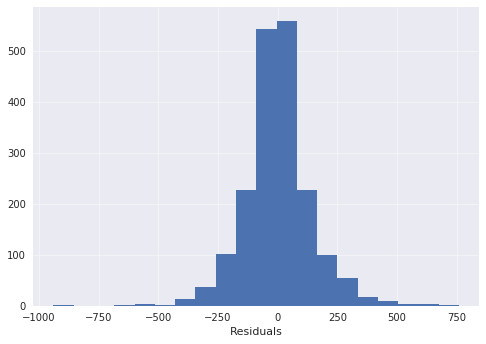

In [38]:
y_pred = w_hat*x + b_hat
residuals = y_pred - y
plt.hist(residuals, bins=20);
plt.grid(True, alpha=0.4);
plt.xlabel('Residuals');
plt.show()

In [39]:
benchmark_residuals = y.mean() - y
R2 = 1.0 - residuals.var()/benchmark_residuals.var()
R2

0.0023971897644888829

Our R^2 value shows that this is no linear correlation between the number of stocks traded for a day and the price change of the DJIA for that same day.

In [40]:
def bootstrap(x, y):
    assert len(x)==len(y)
    nsamples = len(x)
    ind = np.random.randint(0, nsamples, nsamples)
    return x[ind], y[ind]

In [41]:
def bootstrap_fit(x, y, n):
    weights = np.empty(n)
    intercepts = np.empty(n)
    for i in range(n):
        xb, yb = bootstrap(x, y)
        weights[i], intercepts[i] = fit(xb, yb)
    return weights, intercepts

/opt/conda/lib/python3.5/site-packages/matplotlib/font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


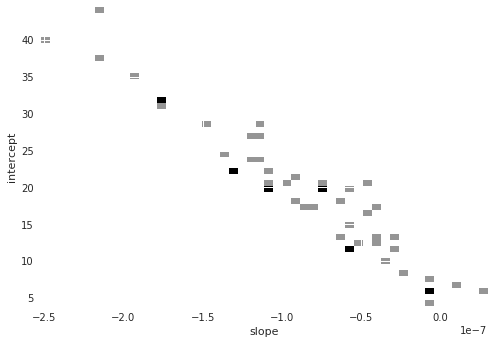

slope 95% CI: [ -2.15362422e-07   7.37650794e-09]
inter 95% CI: [  5.92649286  39.20974591]


In [42]:
marray, barray = bootstrap_fit(data['Volume'], data['Stock_change'], 50)
plt.hist2d(marray, barray, bins=50)
plt.xlabel('slope')
plt.ylabel('intercept');
plt.show()
print("slope 95% CI:", np.percentile(marray, (2.5, 97.5)))
print("inter 95% CI:", np.percentile(barray, (2.5, 97.5)))